In [27]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_dir='/Users/hass877/Work/data_analysis/'
era_orig = xr.open_dataset(data_dir+'era5_an_ml_1280x640_tmp.nc')
era_NA = xr.open_dataset(data_dir+'era5_an_ml_1280x640_tmp_NA2ERA.nc')
lat = era_orig['lat']
# Column mean T (K)
T_orig = era_orig['T'][0].mean(dim='lev')
T_NA = era_NA['T'][0].mean(dim='lev')
T_NA = T_NA.assign_coords(lat=lat)
T_diff = T_orig-T_NA
print(T_diff.shape)
# Column mean U (m s*-1)
U_orig = era_orig['U'][0].mean(dim='lev')
U_NA = era_NA['U'][0].mean(dim='lev')
U_NA = U_NA.assign_coords(lat=lat)
U_diff = U_orig-U_NA
print(U_diff.shape)
# Column mean V (m s*-1)
V_orig = era_orig['V'][0].mean(dim='lev')
V_NA = era_NA['V'][0].mean(dim='lev')
V_NA = V_NA.assign_coords(lat=lat)
V_diff = V_orig-V_NA
print(V_diff.shape)
# PS (ps)
PS_orig = era_orig['PS'][0]
PS_NA = era_NA['PS'][0]
PS_NA = PS_NA.assign_coords(lat=lat)
PS_diff = V_orig-V_NA
print(PS_diff.shape)
# Column mean Q (kg kg**-1)
Q_orig = era_orig['Q'][0].mean(dim='lev')
Q_NA = era_NA['Q'][0].mean(dim='lev')
Q_NA = Q_NA.assign_coords(lat=lat)
Q_diff = Q_orig-Q_NA
print(Q_diff.shape)

(640, 1280)
(640, 1280)
(640, 1280)
(640, 1280)
(640, 1280)


(640, 1280)


Text(0.5, 1.0, 'Relative Diff')

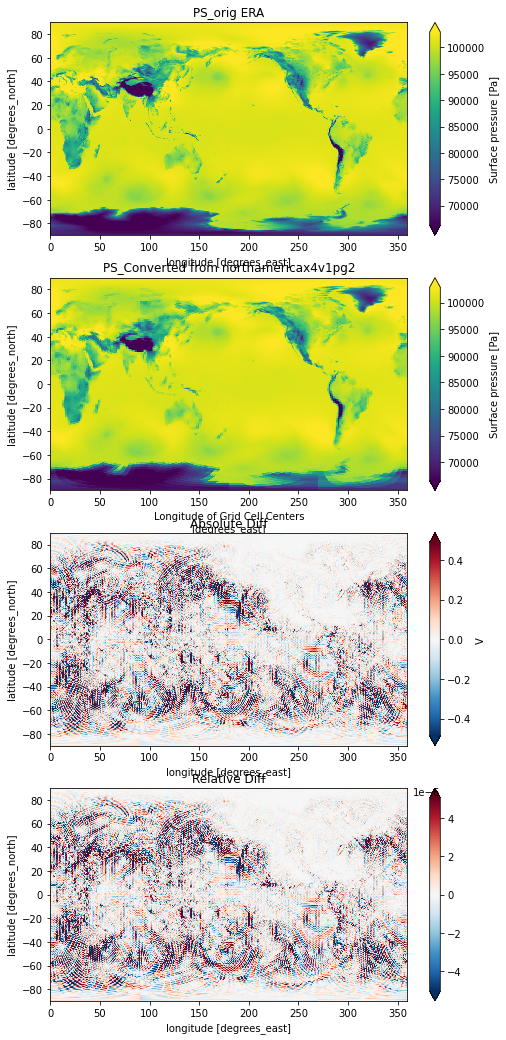

In [143]:
# T plots
plt.figure(figsize=(8,18))
plt.subplot(4,1,1)
PS_orig.plot(robust=True)
plt.title('PS_orig ERA')
plt.subplot(4,1,2)
PS_NA.plot(robust=True)
plt.title('PS_Converted from northamericax4v1pg2')
plt.subplot(4,1,3)
(PS_diff).plot(robust=True)
plt.title('Absolute Diff')
plt.subplot(4,1,4)
(PS_diff/PS_NA).plot(robust=True)
print((PS_diff/PS_NA).shape)
plt.title('Relative Diff')

(1, 640, 1280)
Checking if df length is 1*640*1280 for ERA:  True
mean: -7.149687e-05 std: 0.014916425


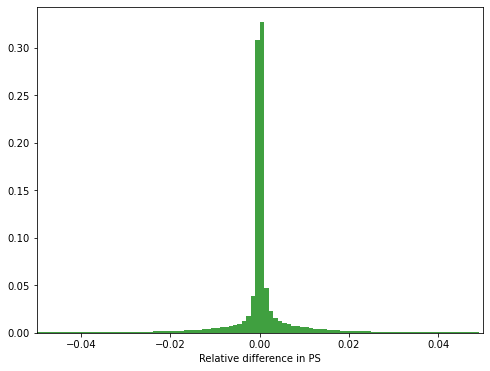

In [62]:
# Checking out the values with a differnce in a histogram for PS
PS_orig = era_orig['PS']
PS_NA = era_NA['PS']
PS_NA = PS_NA.assign_coords(lat=lat)
data = (PS_orig-PS_NA)/PS_NA
print(data.shape)
df=data.to_dataframe('PS').unstack(level=['time','lat','lon'])
print('Checking if df length is 1*640*1280 for ERA: ',len(df)==1*640*1280)
df2 = df.droplevel(['lat','lon'])
bins=np.arange(-.05,.05,0.001)
counts, _ = np.histogram(df2,bins)
counts_w = counts.sum()
plt.figure(figsize=(8,6))
plt.hist(bins[:-1],bins=bins,facecolor='g',alpha=0.75,weights=counts/counts_w)
plt.xlim([-.05,.05])
plt.xlabel('Relative difference in PS')
print('mean:',df2.mean(),'std:',df2.std())

(640, 1280)


Text(0.5, 1.0, 'Relative Diff')

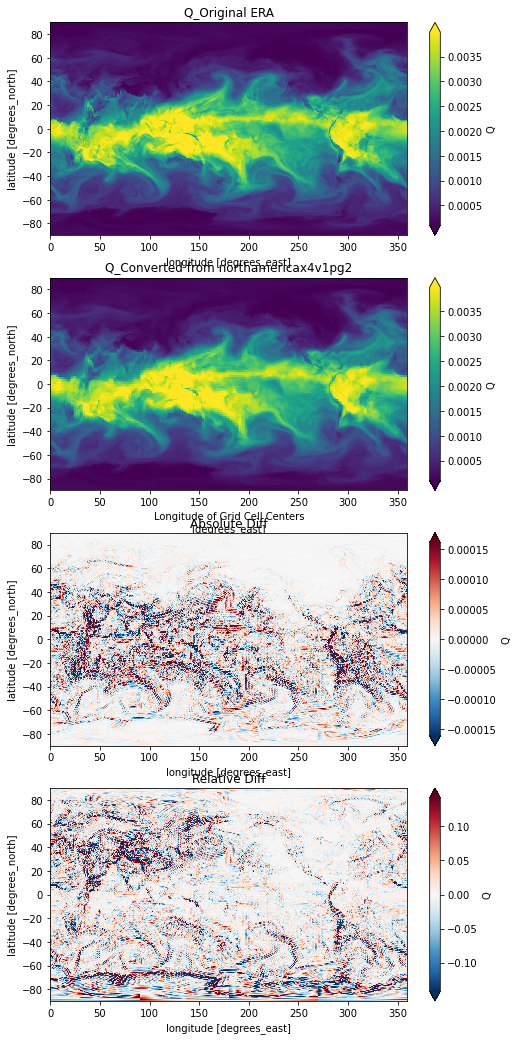

In [142]:
# Q plots
plt.figure(figsize=(8,18))
plt.subplot(4,1,1)
Q_orig.plot(robust=True)
plt.title('Q_Original ERA')
plt.subplot(4,1,2)
Q_NA.plot(robust=True)
plt.title('Q_Converted from northamericax4v1pg2')
plt.subplot(4,1,3)
(Q_diff).plot(robust=True)
plt.title('Absolute Diff')
plt.subplot(4,1,4)
(Q_diff/Q_NA).plot(robust=True)
print((Q_diff/Q_NA).shape)
plt.title('Relative Diff')

(1, 137, 640, 1280)
Checking if df length is 1*137*640*1280 for ERA:  True
mean: -9.6848716e-08 std: 0.00021884018


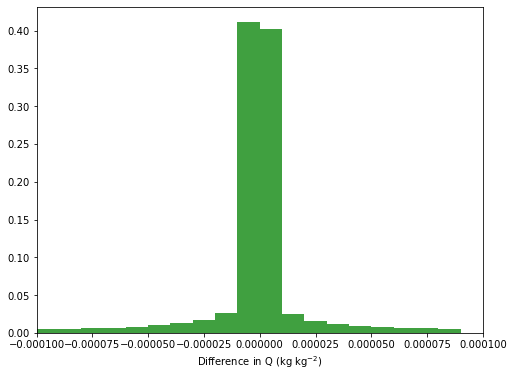

In [69]:
# Checking out the values with a differnce in a histogram for Q
Q_orig = era_orig['Q']
Q_NA = era_NA['Q']
Q_NA = Q_NA.assign_coords(lat=lat)
data = (Q_orig-Q_NA)
print(data.shape)
#df=data.to_dataframe('Q').unstack(level=['time','lat','lon','lev'])
print('Checking if df length is 1*137*640*1280 for ERA: ',len(df)==1*137*640*1280)
#df2 = df.droplevel(['lat','lon','lev'])
bins=np.arange(-.0001,.0001,0.00001)
counts, _ = np.histogram(df2,bins)
counts_w = counts.sum()
plt.figure(figsize=(8,6))
plt.hist(bins[:-1],bins=bins,facecolor='g',alpha=0.75,weights=counts/counts_w)
plt.xlim([-.0001,.0001])
plt.xlabel('Difference in Q (kg kg$^{-2}$)')
print('mean:',df2.mean(),'std:',df2.std())

(640, 1280)


Text(0.5, 1.0, 'Relative Diff')

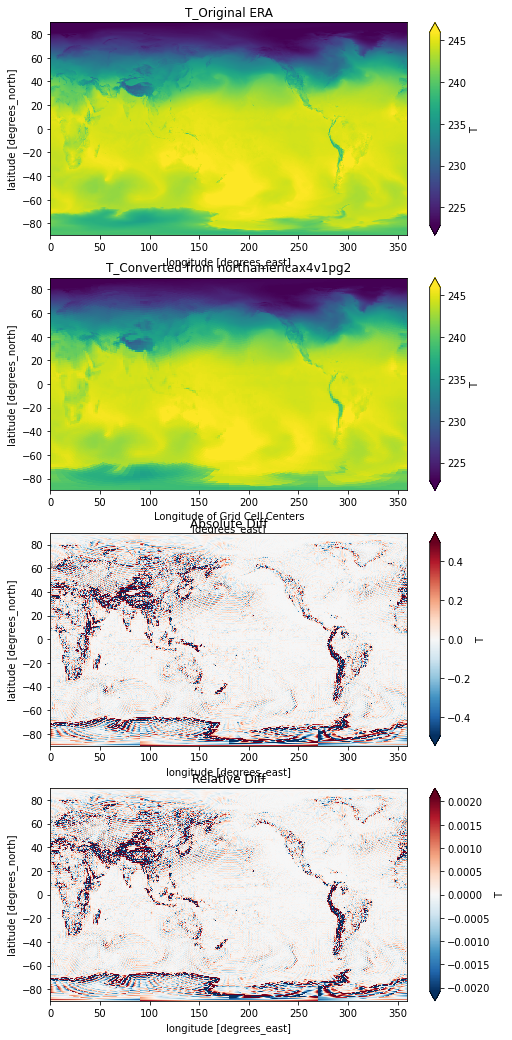

In [144]:
# PS plots
plt.figure(figsize=(8,18))
plt.subplot(4,1,1)
T_orig.plot(robust=True)
plt.title('T_Original ERA')
plt.subplot(4,1,2)
T_NA.plot(robust=True)
plt.title('T_Converted from northamericax4v1pg2')
plt.subplot(4,1,3)
(T_diff).plot(robust=True)
plt.title('Absolute Diff')
plt.subplot(4,1,4)
(T_diff/T_NA).plot(robust=True)
print((T_diff/T_NA).shape)
plt.title('Relative Diff')

(1, 137, 640, 1280)
Checking if df length is 1*137*640*1280 for ERA:  True
mean: -4.453313e-06 std: 0.0021885172


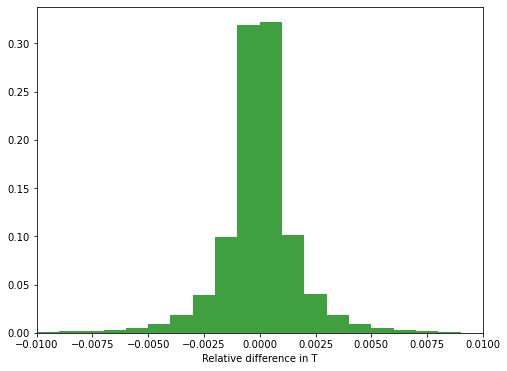

In [58]:
# Checking out the values with a differnce in a histogram for T
T_orig = era_orig['T']
T_NA = era_NA['T']
T_NA = T_NA.assign_coords(lat=lat)
data = (T_orig-T_NA)/T_NA
print(data.shape)
df=data.to_dataframe('T').unstack(level=['time','lat','lon','lev'])
print('Checking if df length is 1*137*640*1280 for ERA: ',len(df)==1*137*640*1280)
df2 = df.droplevel(['lat','lon','lev'])
bins=np.arange(-.01,.01,0.001)
counts, _ = np.histogram(df2,bins)
counts_w = counts.sum()
plt.figure(figsize=(8,6))
plt.hist(bins[:-1],bins=bins,facecolor='g',alpha=0.75,weights=counts/counts_w)
plt.xlim([-.01,.01])
plt.xlabel('Relative difference in T')
print('mean:',df2.mean(),'std:',df2.std())

(640, 1280)


Text(0.5, 1.0, 'Relative Diff')

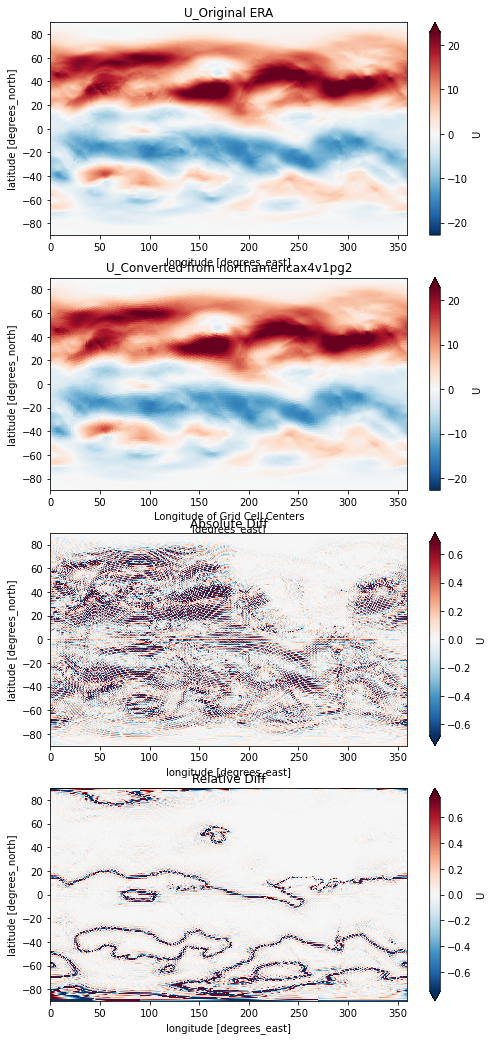

In [145]:
# U plots
plt.figure(figsize=(8,18))
plt.subplot(4,1,1)
U_orig.plot(robust=True)
plt.title('U_Original ERA')
plt.subplot(4,1,2)
U_NA.plot(robust=True)
plt.title('U_Converted from northamericax4v1pg2')
plt.subplot(4,1,3)
(U_diff).plot(robust=True)
plt.title('Absolute Diff')
plt.subplot(4,1,4)
(U_diff/U_NA).plot(robust=True)
print((U_diff/U_NA).shape)
plt.title('Relative Diff')

(640, 1280)


Text(0.5, 1.0, 'Relative Diff')

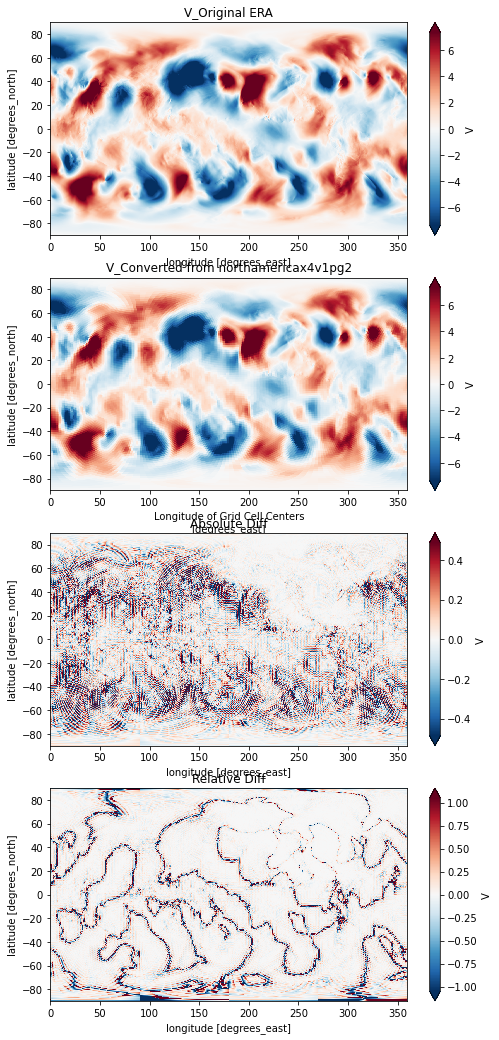

In [146]:
# V plots
plt.figure(figsize=(8,18))
plt.subplot(4,1,1)
V_orig.plot(robust=True)
plt.title('V_Original ERA')
plt.subplot(4,1,2)
V_NA.plot(robust=True)
plt.title('V_Converted from northamericax4v1pg2')
plt.subplot(4,1,3)
(V_diff).plot(robust=True)
plt.title('Absolute Diff')
plt.subplot(4,1,4)
(V_diff/V_NA).plot(robust=True)
print((V_diff/V_NA).shape)
plt.title('Relative Diff')

(640, 1280)
(640, 1280)


Text(0.5, 1.0, 'Relative Diff @118')

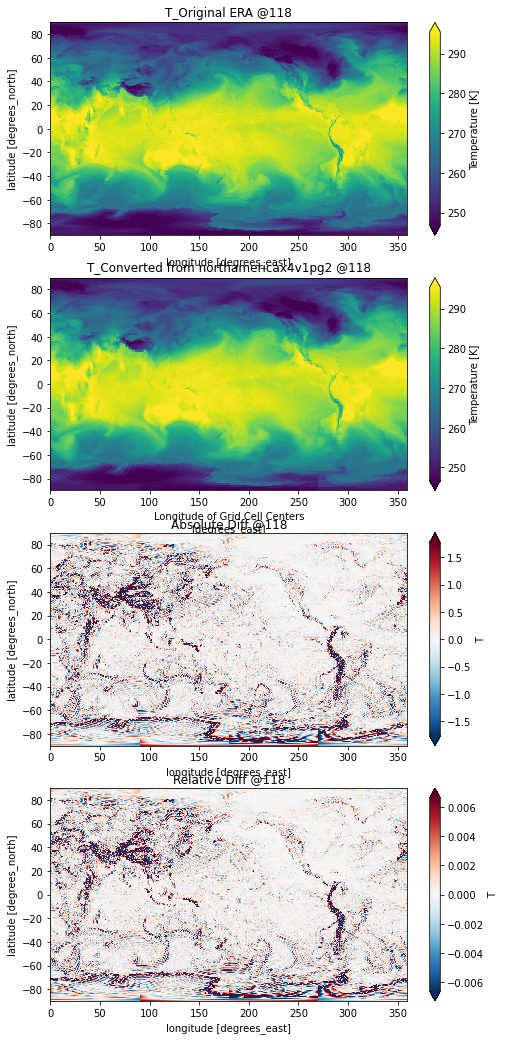

In [147]:
## Looking at lev 118, where there's a 20K absolute difference
T_orig = era_orig['T'][0,118]
T_NA = era_NA['T'][0,118]
T_NA = T_NA.assign_coords(lat=lat)
T_diff = T_orig-T_NA
print(T_diff.shape)
# 
plt.figure(figsize=(8,18))
plt.subplot(4,1,1)
T_orig.plot(robust=True)
plt.title('T_Original ERA @118')
plt.subplot(4,1,2)
T_NA.plot(robust=True)
plt.title('T_Converted from northamericax4v1pg2 @118')
plt.subplot(4,1,3)
(T_diff).plot(robust=True)
plt.title('Absolute Diff @118')
plt.subplot(4,1,4)
(T_diff/T_NA).plot(robust=True)
print((T_diff/T_NA).shape)
plt.title('Relative Diff @118')